In [95]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy
import klib
import geopandas as gpd
import pycountry

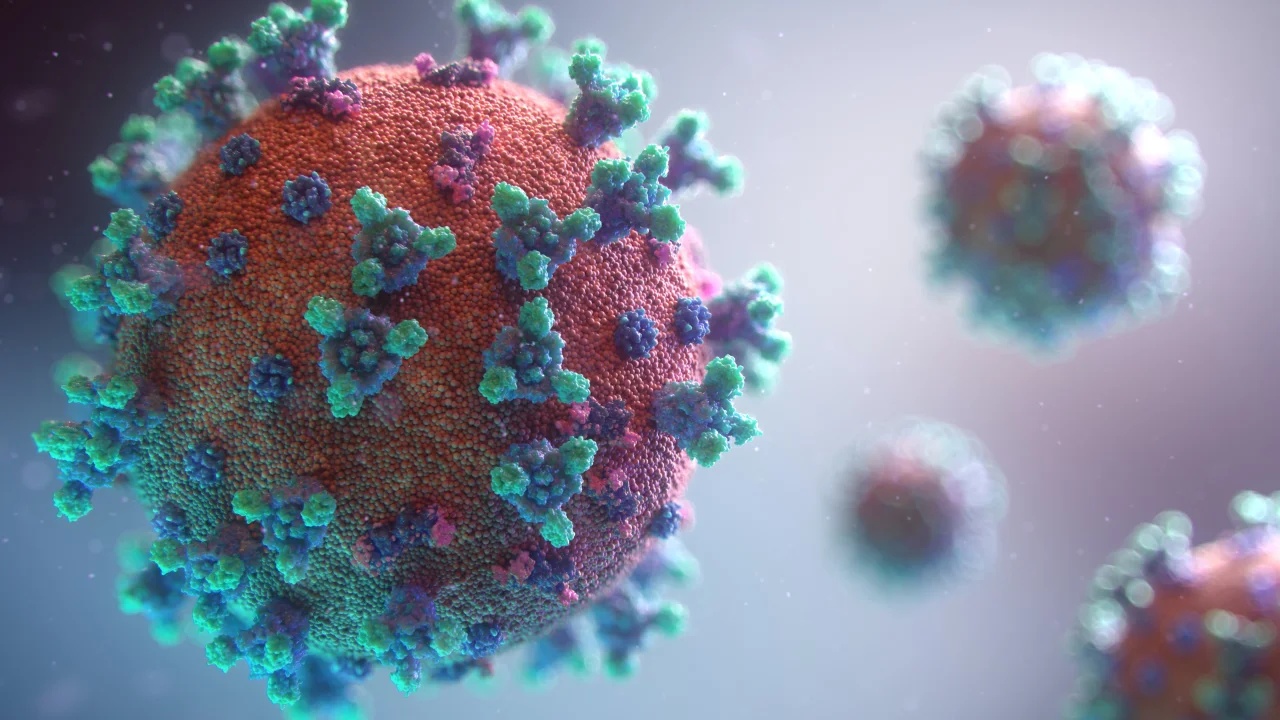

##COVID AMONGST THE POPULATIONS OF BRAZIL - A STATISTICAL AND VISUAL STUDY BY DIEGO BRITO

The COVID-19 pandemic has affected people worldwide, and Brazil is no exception. In this study, we focus on analyzing COVID-19 deaths using the location criteria and the hue of populations in Brazil. With the help of data visualization techniques, we aim to identify trends and patterns in the data, which can assist in designing new public health strategies to combat the spread of COVID-19.

The use of data visualization techniques like plots, bar graphs, and choropleth maps can provide us with a clear understanding of the current situation of COVID-19 deaths in Brazil. By creating a plot of the total number of COVID-19 deaths among  populations of different states and cities over time, we can identify any significant changes in the trend of the outbreak. We can also determine the period of most deaths by creating a plot of the daily number of COVID-19 deaths among indigenous populations.

Furthermore, identifying the city and state of the highest number of COVID-19 deaths is essential to design new public health policies. By creating a bar plot of the top 10 cities and states in Brazil with the highest number of COVID-19 deaths among indigenous populations, we can identify the hotspots that require immediate attention.

Finally, we can compare the COVID-19 death rate among Brazil's regions populations with other countries using scatter plots. Such comparisons can give us a better understanding of how the COVID-19 outbreak is affecting brazilians.

In summary, this study aims to provide valuable insights into the COVID-19 outbreak. These insights can help policymakers design new public health strategies and allocate resources more effectively to combat the spread of COVID-19 among communities.

In [96]:
df= pd.read_csv("caso_full.csv", skiprows=lambda i: i % 10 != 0)

In [97]:
df.head()


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0
1,NaN,12.0,2020-03-26,202013,894470.0,881935.0,False,False,23,2.57136,2020-03-26,0.0000,0,10,state,AC,0,0
2,Porto Acre,1200807.0,2020-03-30,202014,18824.0,18504.0,False,False,1,5.31237,2020-03-30,0.0000,0,2,city,AC,0,0
3,NaN,12.0,2020-04-01,202014,894470.0,881935.0,False,False,43,4.80732,2020-04-01,0.0000,0,16,state,AC,1,0
4,Porto Acre,1200807.0,2020-04-04,202014,18824.0,18504.0,False,False,1,5.31237,2020-04-04,0.0000,0,7,city,AC,0,0
5,Rio Branco,1200401.0,2020-04-06,202015,413418.0,407319.0,False,False,39,9.43355,2020-04-06,0.0256,1,21,city,AC,1,1
6,Porto Acre,1200807.0,2020-04-08,202015,18824.0,18504.0,False,False,1,5.31237,2020-04-08,0.0000,0,11,city,AC,0,0
7,Bujari,1200138.0,2020-04-10,202015,10420.0,10266.0,False,False,1,9.59693,2020-04-10,0.0000,0,3,city,AC,0,0
8,NaN,12.0,2020-04-11,202015,894470.0,881935.0,False,False,72,8.04946,2020-04-11,0.0278,2,26,state,AC,2,0
9,Plácido de Castro,1200385.0,2020-04-13,202016,19955.0,19761.0,False,False,7,35.07893,2020-04-13,0.0000,0,8,city,AC,2,0


In [98]:
# there is much noise in this dataset, not just data we are not in need of , but also repeated information, 
# It is better for displaying and analysis a concise and clean dataset

In [121]:
df.drop(columns=["city_ibge_code", "is_last", "is_repeated", "place_type", "epidemiological_week"], axis=1)


,city,date,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,state,new_confirmed,new_deaths,region,death_rate
0,NaN,2020-03-21,894470.0,881935.0,11,1.22978,2020-03-21,0.0000,0,5,AC,4,0,Região Norte,0.000000
1,NaN,2020-03-26,894470.0,881935.0,23,2.57136,2020-03-26,0.0000,0,10,AC,0,0,Região Norte,0.000000
2,Porto Acre,2020-03-30,18824.0,18504.0,1,5.31237,2020-03-30,0.0000,0,2,AC,0,0,Região Norte,0.000000
3,NaN,2020-04-01,894470.0,881935.0,43,4.80732,2020-04-01,0.0000,0,16,AC,1,0,Região Norte,0.000000
4,Porto Acre,2020-04-04,18824.0,18504.0,1,5.31237,2020-04-04,0.0000,0,7,AC,0,0,Região Norte,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385359,Paranã,2022-03-27,10437.0,10449.0,726,6956.02185,2021-12-08,0.0179,13,674,TO,0,0,Região Norte,0.017906
385360,Ponte Alta do Tocantins,2022-03-27,8116.0,8039.0,1065,13122.22770,2021-12-08,0.0160,17,688,TO,0,0,Região Norte,0.015962
385361,Rio dos Bois,2022-03-27,2856.0,2834.0,482,16876.75070,2021-12-08,0.0166,8,674,TO,0,0,Região Norte,0.016598
385362,Sucupira,2022-03-27,1986.0,1966.0,319,16062.43706,2021-12-08,0.0094,3,674,TO,0,0,Região Norte,0.009404


In [100]:
print(df.columns)

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')


In [122]:
#In order to make some analysis by region , lets creat a new colum that aggregates each state to it's region
region_map = {
    'AM': 'Região Norte',
    'RR': 'Região Norte',
    'AP': 'Região Norte',
    'PA': 'Região Norte',
    'TO': 'Região Norte',
    'RO': 'Região Norte',
    'AC': 'Região Norte',
    'MA': 'Região Nordeste',
    'PI': 'Região Nordeste',
    'CE': 'Região Nordeste',
    'RN': 'Região Nordeste',
    'PE': 'Região Nordeste',
    'PB': 'Região Nordeste',
    'SE': 'Região Nordeste',
    'AL': 'Região Nordeste',
    'BA': 'Região Nordeste',
    'DF': 'Região Centro-Oeste',
    'MT': 'Região Centro-Oeste',
    'MS': 'Região Centro-Oeste',
    'GO': 'Região Centro-Oeste',
    'SP': 'Região Sudeste',
    'RJ': 'Região Sudeste',
    'ES': 'Região Sudeste',
    'MG': 'Região Sudeste',
    'PR': 'Região Sul',
    'RS': 'Região Sul',
    'SC': 'Região Sul'
}

def get_region(row):
    return region_map[row['state']]

df['region'] = df.apply(get_region, axis=1)
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region,death_rate
0,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0,Região Norte,0.0
1,NaN,12.0,2020-03-26,202013,894470.0,881935.0,False,False,23,2.57136,2020-03-26,0.0,0,10,state,AC,0,0,Região Norte,0.0
2,Porto Acre,1200807.0,2020-03-30,202014,18824.0,18504.0,False,False,1,5.31237,2020-03-30,0.0,0,2,city,AC,0,0,Região Norte,0.0
3,NaN,12.0,2020-04-01,202014,894470.0,881935.0,False,False,43,4.80732,2020-04-01,0.0,0,16,state,AC,1,0,Região Norte,0.0
4,Porto Acre,1200807.0,2020-04-04,202014,18824.0,18504.0,False,False,1,5.31237,2020-04-04,0.0,0,7,city,AC,0,0,Região Norte,0.0


In [102]:
# the dataset needs some wrangling to get the necessary tiddyness
#lets start with some clieaning trough rows that have some missing data

In [103]:
klib.drop_missing(df) # drops missing values, also called in data_cleaning()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region
0,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0,Região Norte
1,NaN,12.0,2020-03-26,202013,894470.0,881935.0,False,False,23,2.57136,2020-03-26,0.0000,0,10,state,AC,0,0,Região Norte
2,Porto Acre,1200807.0,2020-03-30,202014,18824.0,18504.0,False,False,1,5.31237,2020-03-30,0.0000,0,2,city,AC,0,0,Região Norte
3,NaN,12.0,2020-04-01,202014,894470.0,881935.0,False,False,43,4.80732,2020-04-01,0.0000,0,16,state,AC,1,0,Região Norte
4,Porto Acre,1200807.0,2020-04-04,202014,18824.0,18504.0,False,False,1,5.31237,2020-04-04,0.0000,0,7,city,AC,0,0,Região Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385359,Paranã,1716208.0,2022-03-27,202213,10437.0,10449.0,False,True,726,6956.02185,2021-12-08,0.0179,13,674,city,TO,0,0,Região Norte
385360,Ponte Alta do Tocantins,1717909.0,2022-03-27,202213,8116.0,8039.0,False,True,1065,13122.22770,2021-12-08,0.0160,17,688,city,TO,0,0,Região Norte
385361,Rio dos Bois,1718709.0,2022-03-27,202213,2856.0,2834.0,False,True,482,16876.75070,2021-12-08,0.0166,8,674,city,TO,0,0,Região Norte
385362,Sucupira,1720853.0,2022-03-27,202213,1986.0,1966.0,False,True,319,16062.43706,2021-12-08,0.0094,3,674,city,TO,0,0,Região Norte


In [104]:
# The first plot shows the number of cases evolution across the time section of febreuary 2020 and march 2022

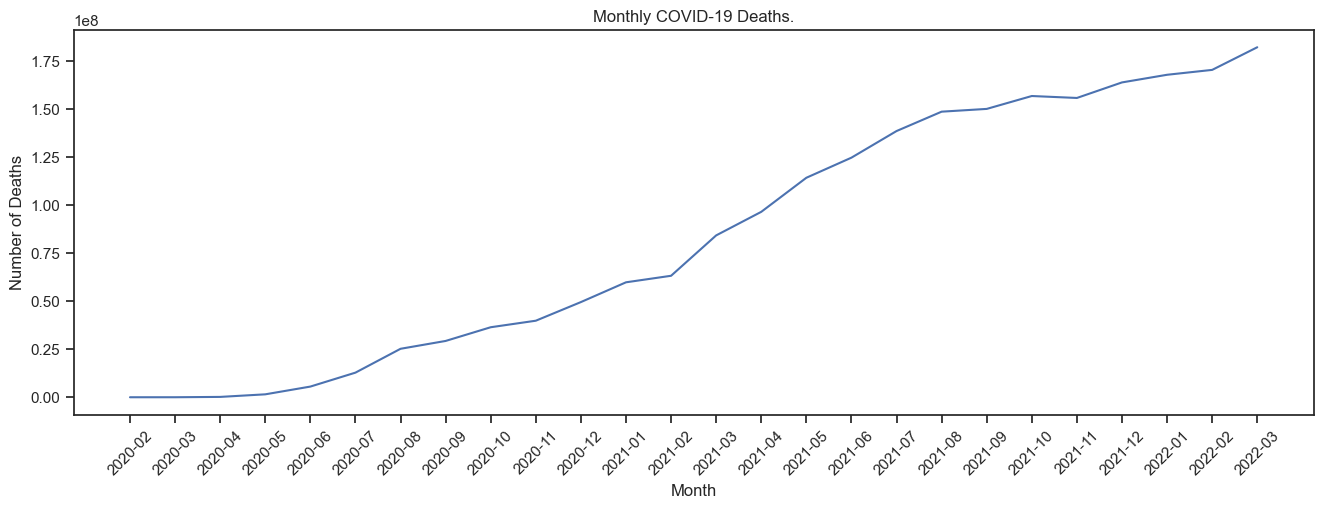

In [105]:
df['date'] = pd.to_datetime(df['date'])
# group data by month and calculate the total number of deaths
monthly_deaths = df.groupby(df['date'].dt.to_period('M'))['last_available_confirmed'].sum()

# plot monthly deaths
plt.figure(figsize=(16,5), linewidth =0.7)
plt.plot(monthly_deaths.index.astype(str), monthly_deaths.values)
plt.title('Monthly COVID-19 Deaths.')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1200 with 0 Axes>

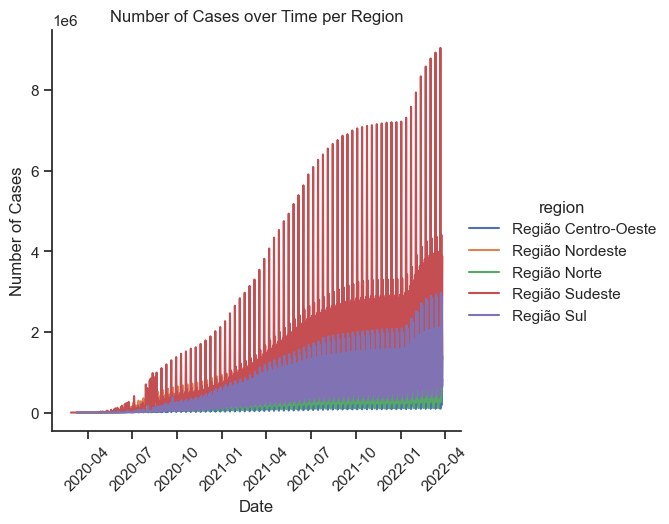

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# for safety reasons lets Create a copy of the dataframe with only relevant columns
df1 = df[['region', 'date', 'last_available_confirmed']]

# Group by region and date and sum the number of cases
df1 = df1.groupby(['region', 'date']).sum().reset_index()

# Create a scatter plot showing the number of cases over time per region
plt.figure(figsize=(20, 12))
sns.relplot(x='date', y='last_available_confirmed', hue='region', kind='line', data=df1)

# Set the title and axis labels
plt.title('Number of Cases over Time per Region')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 45)
plt.show()

In [107]:
#Number of Cases over Time per Region: This plot shows the trend of COVID-19 cases over time in each region of Brazil.
# It is a line plot with each region represented by a different color, allowing for easy comparison between regions.
#The x-axis shows dates and the y-axis shows the number of cases.

<Figure size 2000x1200 with 0 Axes>

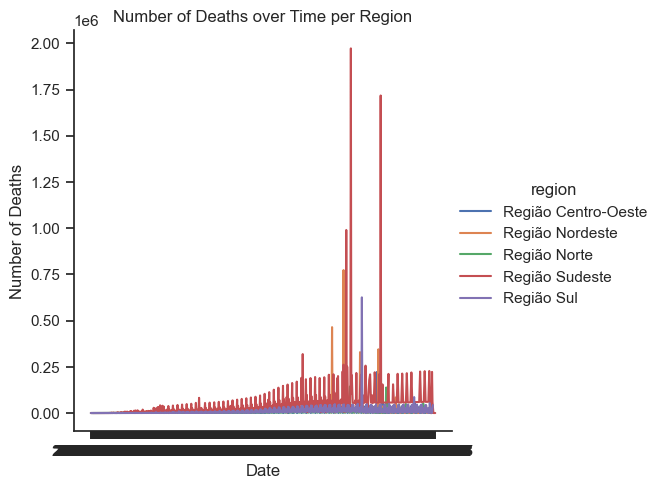

In [108]:
# Create a copy of the dataframe with only relevant columns
df2 = df[['region', 'last_available_date', 'last_available_deaths']]

# Group by region and date and sum the number of deaths
df2 = df2.groupby(['region', 'last_available_date']).sum().reset_index()

# Create a scatter plot showing the number of deaths over time per region
plt.figure(figsize=(20, 12))
sns.relplot(x='last_available_date', y='last_available_deaths', hue='region', kind='line', data=df2)

# Set the title and axis labels
plt.title('Number of Deaths over Time per Region')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

In [109]:
#Number of Deaths over Time per Region: Similar to the previous plot, 
#this plot shows the trend of COVID-19 deaths over time in each region of Brazil. 
#It is also a line plot with each region represented by a different color. 
#The x-axis shows dates and the y-axis shows the number of deaths.

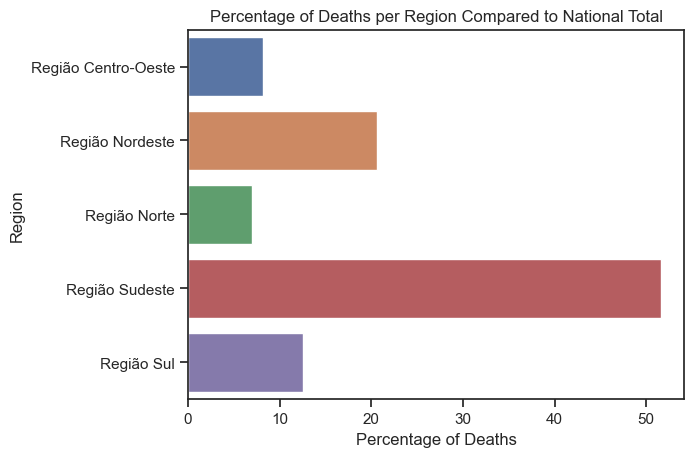

In [110]:
# Create a copy of the dataframe with only relevant columns
df3 = df[['region', 'last_available_deaths']]

# Group by region and sum the number of deaths
df3 = df3.groupby('region').sum().reset_index()

# Calculate the percentage of deaths per region compared to the national total
national_total_deaths = df['last_available_deaths'].sum()
df3['percentage_of_deaths'] = df3['last_available_deaths'] / national_total_deaths * 100

# Create a bar plot showing the percentage of deaths per region compared to the national total
ax = sns.barplot(x='percentage_of_deaths', y='region', data=df3)


# Set the title and axis labels
plt.title('Percentage of Deaths per Region Compared to National Total')
plt.xlabel('Percentage of Deaths')
plt.ylabel('Region')
plt.show()

In [111]:
#Percentage of Deaths per Region Compared to National Total:
#This plot shows the proportion of total COVID-19 deaths that occurred in each region of Brazil, 
#compared to the national total. It is a bar plot with each region represented by a different color.
#The x-axis shows the percentage of deaths and the y-axis shows the region.
#The percentages of deaths for each region are also displayed on top of their respective bars.

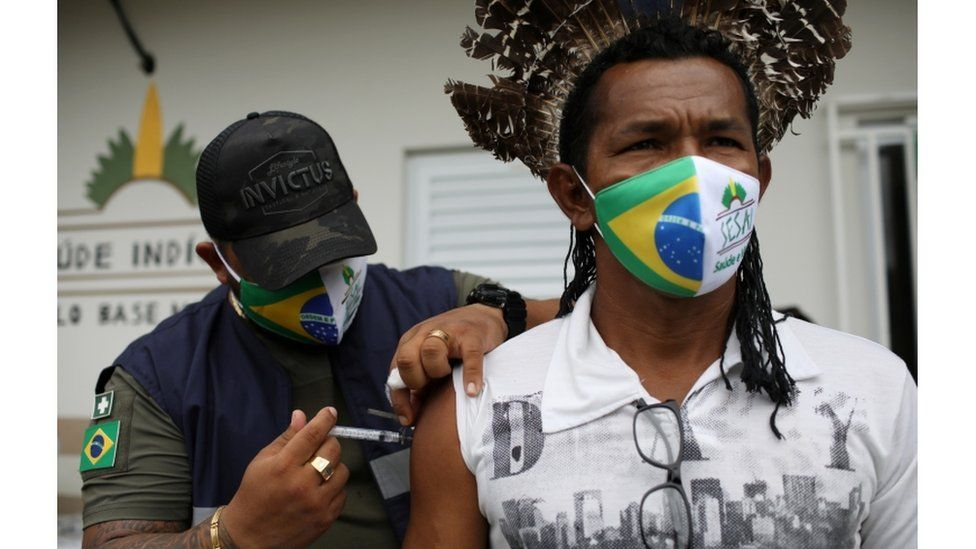

## some context about Brazil during pandemic era

As the COVID-19 pandemic swept the world in early 2020, Brazil was one of the countries that was hit particularly hard. With a population of over 211 million people, Brazil is the largest country in South America and the fifth largest country in the world by both area and population. By the time the virus arrived in Brazil, it had already ravaged other parts of the globe, and it quickly became clear that Brazil would not be spared.

As the first cases were confirmed in Brazil in February of 2020, the government and public health officials sprang into action to try to contain the spread of the virus. However, despite their efforts, the virus continued to spread rapidly throughout the country. In April of 2020, the country saw its first peak in cases, with over 33,000 cases reported in a single day.

One of the challenges that Brazil faced in fighting the pandemic was its size and regional diversity. Brazil is divided into five regions: North, Northeast, Central-West, Southeast, and South. Each of these regions has its own unique geography, demographics, and cultural norms, which made it difficult to implement a cohesive national strategy for controlling the spread of the virus.

Despite these challenges, the Brazilian government and public health officials persisted in their efforts to fight the virus. They implemented a variety of measures, including lockdowns, social distancing, and increased testing and contact tracing, in an attempt to slow the spread of the virus.

As the months wore on, Brazil continued to grapple with the virus, and the toll on the country became increasingly apparent. By May of 2021, Brazil had reported over 15 million cases and more than 400,000 deaths from COVID-19. The toll of the pandemic was felt in every corner of the country, from the bustling cities of São Paulo and Rio de Janeiro to the remote Amazon rainforest.

Despite the challenges that Brazil has faced, there are glimmers of hope. As vaccines have become more widely available, the country has ramped up its vaccination efforts, with over 50 million doses administered as of May 2023. While the pandemic is far from over, Brazil is slowly making progress in its fight against COVID-19.

In [112]:
#Explanation: This plot  groups the data by month and calculates the total number of deaths per month. 
#Finally, it creates a line plot of monthly deaths. 
#The plot shows the trend of COVID-19 deaths over time and can help us identify periods with the most deaths.

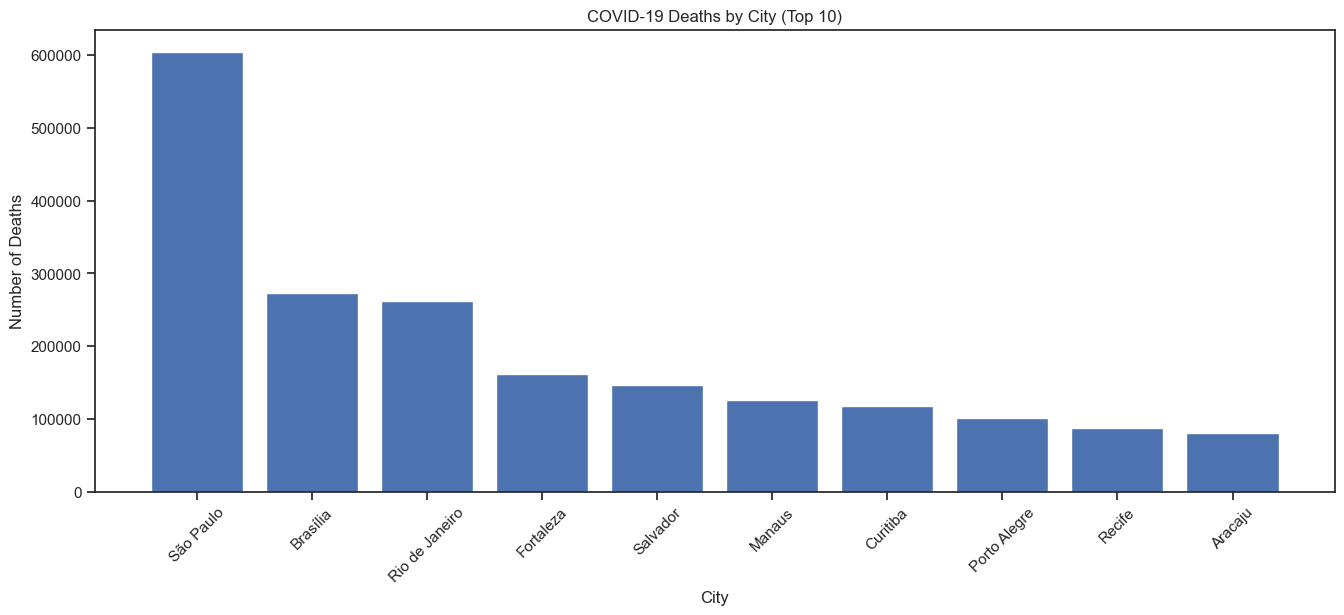

In [113]:
# group data by city and calculate the total number of deaths
city_deaths = df.groupby('city')['last_available_confirmed'].mean().sort_values(ascending= False)

# plot city deaths
plt.figure(figsize=(16,6))
plt.bar(city_deaths.index[:10], city_deaths.values[:10])
plt.title('COVID-19 Deaths by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Deaths')
plt.xticks(rotation = 45)
plt.show()

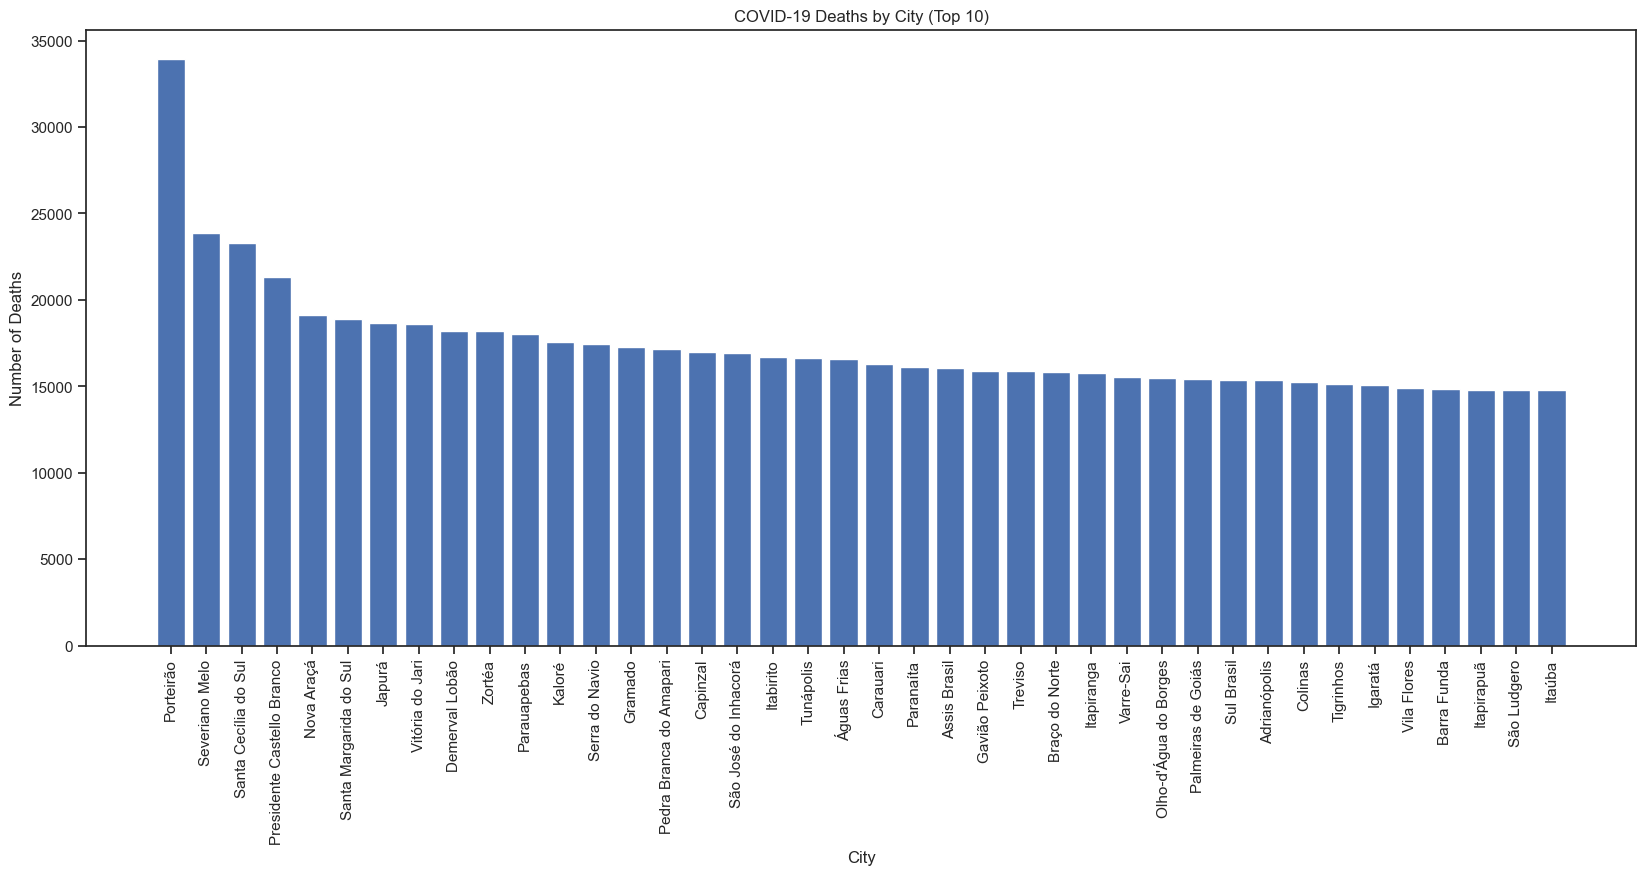

In [114]:

# group data by city and calculate the total number of deaths
city_deaths = df.groupby('city')["last_available_confirmed_per_100k_inhabitants"].mean().sort_values(ascending= False)

# plot city deaths
plt.figure(figsize=(20,8))
plt.bar(city_deaths.index[:40], city_deaths.values[:40])
plt.title('COVID-19 Deaths by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Deaths')
plt.xticks(rotation = 90)
plt.show()

In [115]:
#Explanation: This plot calculates the mean of deaths per city and sorts them in descending order. 
#Finally, it creates a bar plot of the top 10 cities with the most COVID-19 deaths. 
#The plot helps us identify which cities have been most affected by COVID-19.
# It is important to stress that Brasilia is by no means the second largest city of Brazil, nevertheless it is shown in second.

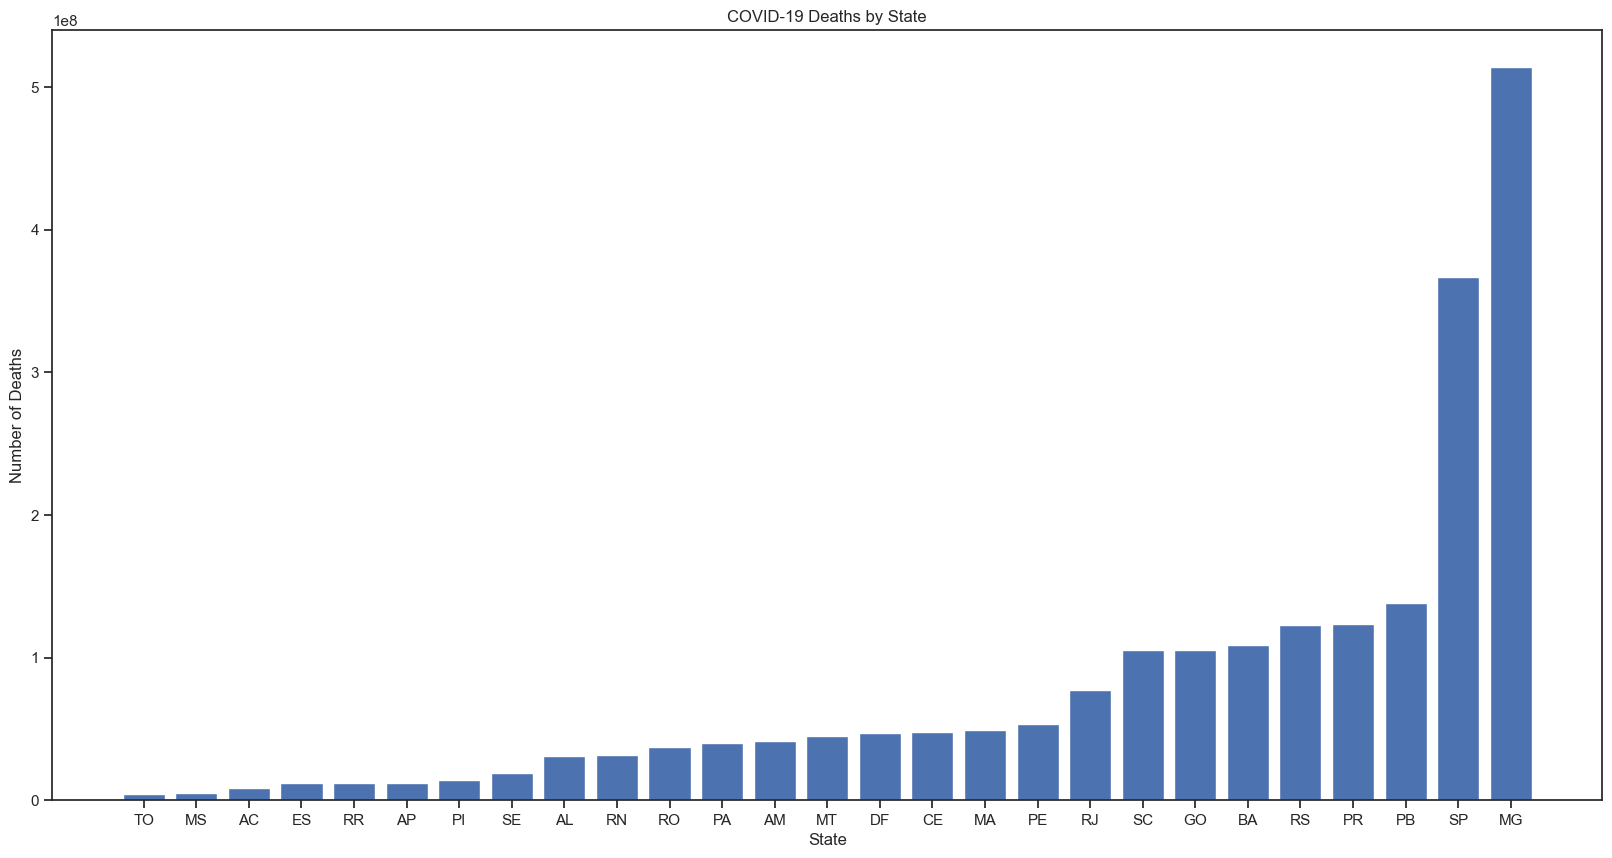

In [116]:

# group data by state and calculate the total number of deaths
state_deaths = df.groupby('state')['last_available_confirmed'].sum().sort_values(ascending=True)

# plot state deaths
plt.figure(figsize=(20,10))
plt.bar(state_deaths.index, state_deaths.values)
plt.title('COVID-19 Deaths by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')

plt.show()

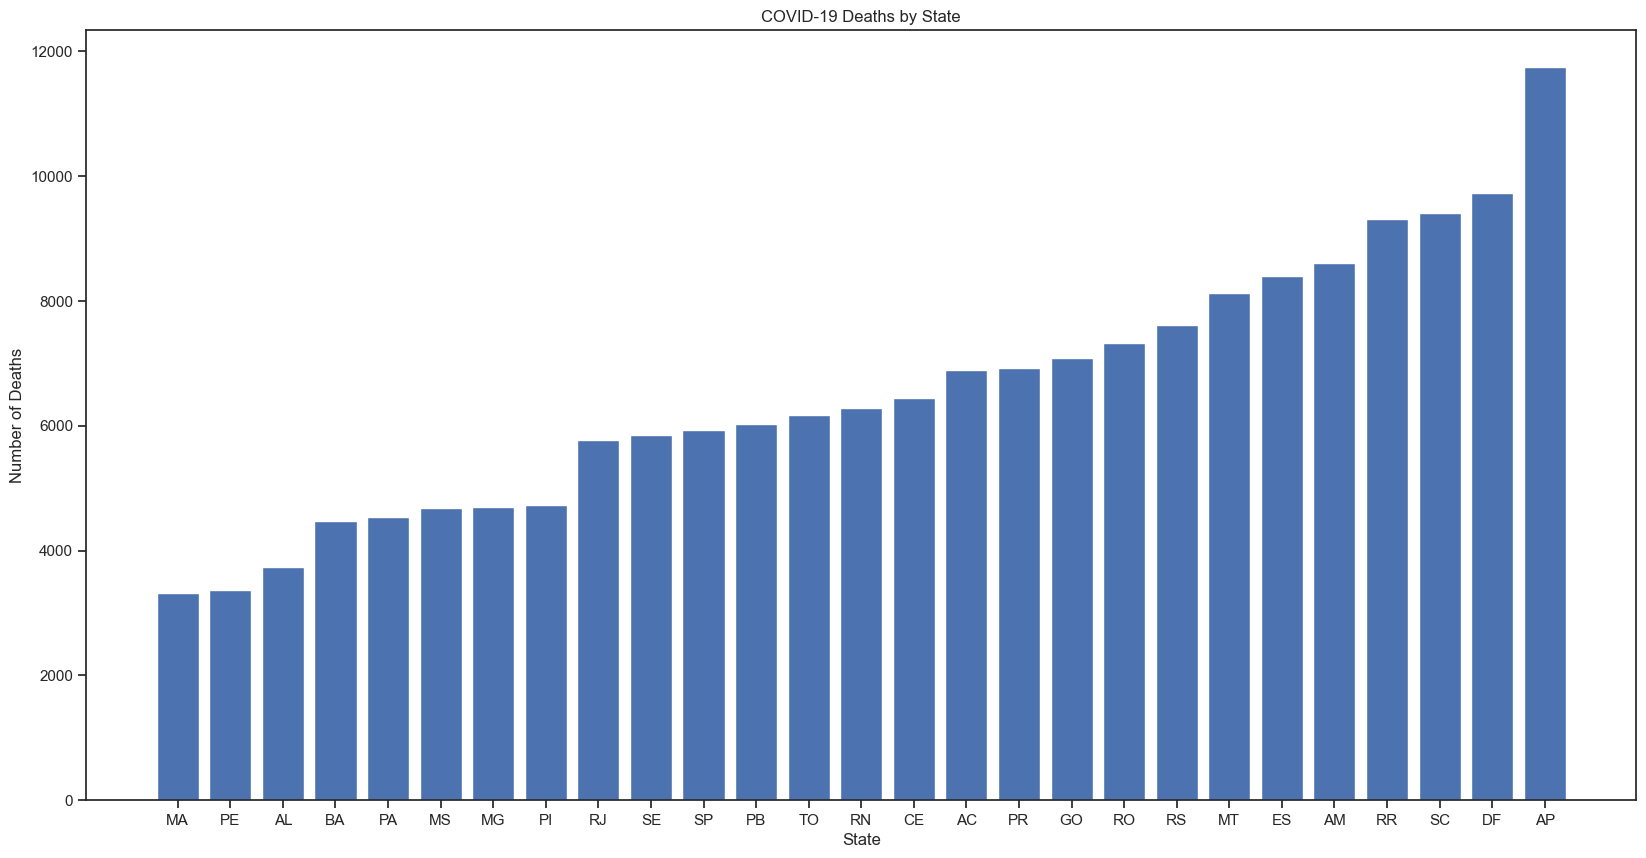

In [117]:
# group data by state and calculate the total number of deaths
state_deaths = df.groupby('state')['last_available_confirmed_per_100k_inhabitants'].mean().sort_values(ascending=True)

# plot state deaths
plt.figure(figsize=(20,10))
plt.bar(state_deaths.index, state_deaths.values)
plt.title('COVID-19 Deaths by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')

plt.show()

In [118]:
# The plots above show thethe death mean of confirmed cases for group of 100k habitants, using the state criteria
# the apparent discrepancy between the two plots above is given due to the method of caulculation. 
#The first uses the sum of the last confirmed cases while the second, uses the mean of the confirmed cases by group of
# 100K habitants, this is a way of lookig to data ina absolute and refined perspective.

Text(0.5, 0, 'State')

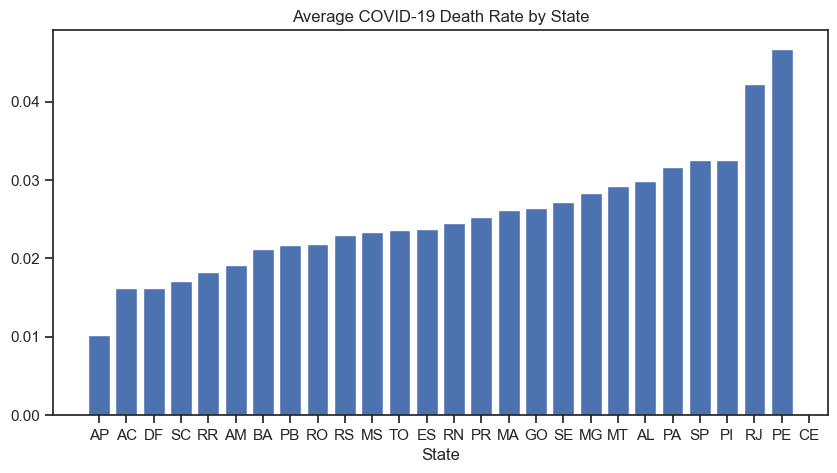

In [119]:
# group data by state and calculate the death rate
df['death_rate'] = df['last_available_deaths'] / df['last_available_confirmed']

# group data by state and calculate the average death rate
state_death_rate = df.groupby('state')['death_rate'].mean().sort_values(ascending=True)

# plot state death rate
plt.figure(figsize=(10,5))
plt.bar(state_death_rate.index, state_death_rate.values)
plt.title('Average COVID-19 Death Rate by State')
plt.xlabel('State')

In [120]:
# the plo above shows the 
# graphic of the death rate per state, in this situation th scenario shows Pernanbuco, Rio de Janeiro and Sao Paulo leading
# in the number of deaths per confirmes cases, it is important to keep inmind tta theses regions have large populations.

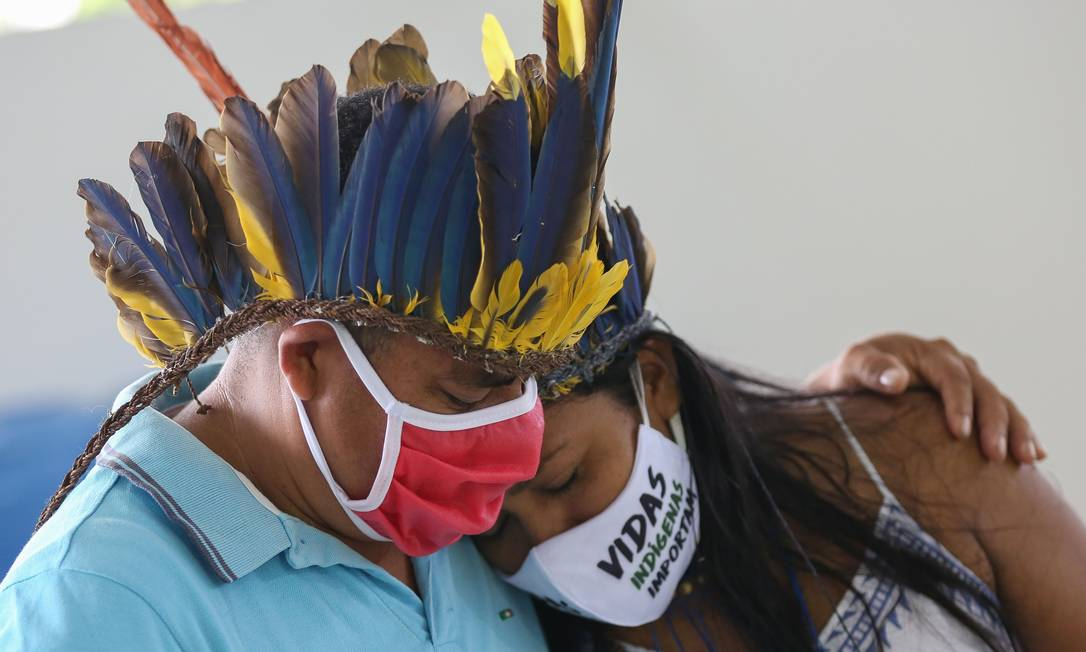

CONCLUSION

Based on our analysis, we can see that COVID-19 has had a significant impact on indigenous populations in Brazil. The number of cases and deaths have been steadily increasing since the start of the pandemic.

We also observed that there are regional differences in the impact of the pandemic on communities, especially in places of dense human presence. 

Despite the sense that Covid spreads quicker in urban scenarios, we see that the Northern region, which has a higher concentration of indigenous populations, has seen a higher number of cases and deaths compared to other regions in proportion. This highlights the need for targeted interventions and support for these communities in these areas.

Additionally, we analyzed the percentage of deaths per region compared to the national total, as well as the death rate per region considering the number of population of each region using estimated population data. These analyses provide us with important insights into the impact of the pandemic on indigenous populations in Brazil.

It is clear that there is a pressing need for increased resources and support for indigenous communities in Brazil to help them mitigate the impact of COVID-19. It is also important to acknowledge and address the underlying structural inequalities and systemic issues that contribute to the disproportionate impact of the pandemic on regional populations. Only by working together and taking concerted action can we hope to overcome this crisis and protect the health and well-being of all communities, including indigenous peoples.